In [152]:
import pandas as pd
import csv
import numpy as np
import matplot
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer, SnowballStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re as r
from collections import Counter
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
#############KMEANS ANALYSIS
##################################################
####imports packages for the Kmeans analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
############### LSA
#######applies the tdidf transformation : again remove stop_words in english, keeps 1000 words with a minimum of 50% frequency below
from sklearn.feature_extraction.text import TfidfVectorizer
##############topic modelling
####################################################
import gensim as gensim
from gensim.test.utils import common_texts
#from gensim.corpora import MmCorpus
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
#functions for LDA
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
g = open(r"I:\!Projekte\SEEK_131328_2019_Biocluster\Data\MUP-Match\dbsemantic1819.txt", "r", encoding='utf8',  errors='ignore') 
#print(g.read())

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
#loads the txt file and splits for each row -- append in array
arrays = []
path = r"I:\!Projekte\SEEK_131328_2019_Biocluster\Data\MUP-Match\dbsemantic1819.txt"
with open(path, encoding="utf8") as f: 
    reader = csv.reader(f)
    for row in reader: 
        row = str(row).replace('\\', '')
        #row=[p for p in re.split("( |\\\".*?\\\"|'.*?')", str(row))if p.strip()]
        #row= re.split('\t', str(row))
       # row = str(row).split('" ')
        arrays.append(row)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
print(arrays[:][3])

['3 "2010680145" "Copyright Â© 2018 ProBioGen AG | |Goethestrasse 54 13086 Berlin', ' Germany Phone: +49 (0) 30 924 006-0 Email:SearchSearchProBioGen AGServices Innovative Technologies Company News & Events Careers Contact Services GMP Production Cell Lines Process Development Virus Production Development GMP Manufacturing Biosimilars & Biobetters Analytics/Bioassays Quality Management Innovative Technologies Genetic Glyco-Engineering/ ADCC (GlymaxX ) Virus Production Cell Lines Viral Vector Technologies Protein Conjugation/ADCs (C-LiNK ) Immunogenicity/-function Testing (Human Artificial Lymph Node) Productivity Increase Company News & Events Press Releases Publications Events Careers Open Positions Unsolicited Applications Applicant Login FAQ Contact & Directions Contact General Contact Legal Notice Disclaimer Data Protection Search" 0']


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [157]:
#print(arrays[:][1])

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
print(arrays[:][0])

['ID "text" "clu"']


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
cluster=pd.DataFrame(arrays)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [160]:
cluster.head(4)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"['ID ""text"" ""clu""']"
1,"['1 ""2010680145"" ""We develop and manufacture y..."
2,"['2 ""2010680145"" ""We only accept online applic..."
3,"['3 ""2010680145"" ""Copyright Â© 2018 ProBioGen ..."


In [161]:
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
#gives the header
print(arrays[:][0])

['ID "text" "clu"']


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#turning into a dataframe
#cluster=pd.DataFrame(arrays)

In [13]:
#cluster.head(4)

In [14]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       97 non-null     object
dtypes: object(1)
memory usage: 904.0+ bytes


In [15]:
headers = cluster.iloc[0]
#headers = headers.replace(" "", "")
new_df  = pd.DataFrame(cluster.values[1:], columns=headers)

In [16]:
print(headers)

0    ['ID "text" "clu"']
Name: 0, dtype: object


In [163]:
new_df.head(4)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID
0,"['1 ""2010680145"" ""We develop and manufacture y..."
1,"['2 ""2010680145"" ""We only accept online applic..."
2,"['3 ""2010680145"" ""Copyright Â© 2018 ProBioGen ..."
3,"['4 ""2010680145"" ""Vienna', ' Austria Vienna', ..."


In [164]:
new_df.tail(10)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID
86,"['371 ""2011223930"" ""Informieren Sie sich Ã¼ber..."
87,"['421 ""6070420253"" ""Als GLP/GCP Auftragslabor ..."
88,"['51 ""3310181051"" ""With more than 15 years of ..."
89,"['52 ""2012022473"" ""Patientensicherheit', ' Beh..."
90,"['53 ""4070513975"" ""Using our strong technology..."
91,"['55 ""6250214166"" ""Main menu:|TIGO GmbHTIGO Gm..."
92,"['56 ""6190275933"" ""Let yourself be surprised b..."
93,"['63 ""2012327335"" ""moloX focusses on the produ..."
94,"['81 ""2012669934"" ""CelldegNavigation about us ..."
95,"['82 ""2151732684"" ""CGS Crop Genetic Systems UG..."


In [165]:
new_df.shape

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(96, 1)

In [166]:
new_df.head(3)
###results with the initial file from dbsemantic1819

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID
0,"['1 ""2010680145"" ""We develop and manufacture y..."
1,"['2 ""2010680145"" ""We only accept online applic..."
2,"['3 ""2010680145"" ""Copyright Â© 2018 ProBioGen ..."


In [167]:
new_df.columns=["ID"]

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
new_df.head(5)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID
0,"['1 ""2010680145"" ""We develop and manufacture y..."
1,"['2 ""2010680145"" ""We only accept online applic..."
2,"['3 ""2010680145"" ""Copyright Â© 2018 ProBioGen ..."
3,"['4 ""2010680145"" ""Vienna', ' Austria Vienna', ..."
4,"['5 ""2010680145"" ""Wir akzeptieren nur Online-B..."


In [169]:
expand = pd.DataFrame(new_df.ID.str.split('" ',1).tolist(),
                                 columns = ["ID", "text"])

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [170]:
expand.head(4)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,text
0,"['1 ""2010680145","""We develop and manufacture your biopharmaceut..."
1,"['2 ""2010680145","""We only accept online applications. Online ap..."
2,"['3 ""2010680145","""Copyright Â© 2018 ProBioGen AG | |Goethestras..."
3,"['4 ""2010680145","""Vienna', ' Austria Vienna', ' Austria Boston'..."


In [171]:
expand[['text', 'clu']] = expand['text'].str.split('" ', n=1, expand=True)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
expand.head(4) ###still noise with the brackets

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,text,clu
0,"['1 ""2010680145","""We develop and manufacture your biopharmaceut...",or even boosting your viral vector or vaccine ...
1,"['2 ""2010680145","""We only accept online applications. Online ap...",0']
2,"['3 ""2010680145","""Copyright Â© 2018 ProBioGen AG | |Goethestras...",0']
3,"['4 ""2010680145","""Vienna', ' Austria Vienna', ' Austria Boston'...",0']


In [173]:
expand['ID'] =  expand['ID'].apply(lambda x: x.replace('[','').replace(']','')) 

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
expand.head(4)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,text,clu
0,"'1 ""2010680145","""We develop and manufacture your biopharmaceut...",or even boosting your viral vector or vaccine ...
1,"'2 ""2010680145","""We only accept online applications. Online ap...",0']
2,"'3 ""2010680145","""Copyright Â© 2018 ProBioGen AG | |Goethestras...",0']
3,"'4 ""2010680145","""Vienna', ' Austria Vienna', ' Austria Boston'...",0']


In [175]:
expand['clu'] =  expand['clu'].apply(lambda x: x.replace('[','').replace(']','')) 

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
expand.head(4)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,text,clu
0,"'1 ""2010680145","""We develop and manufacture your biopharmaceut...",or even boosting your viral vector or vaccine ...
1,"'2 ""2010680145","""We only accept online applications. Online ap...",0'
2,"'3 ""2010680145","""Copyright Â© 2018 ProBioGen AG | |Goethestras...",0'
3,"'4 ""2010680145","""Vienna', ' Austria Vienna', ' Austria Boston'...",0'


In [177]:
expand['ID'] = expand['ID'].str[2:] #removes the space and row number

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
expand['ID']  = expand['ID'].str.replace(r"[\"]", '') #removes the double quote marks

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-178-e07b0bd25f1f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  expand['ID']  = expand['ID'].str.replace(r"[\"]", '') #removes the double quote marks


In [179]:
expand['clu']  = expand['clu'].str.replace(r"[\'']", '') #remove the single quote

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-179-9d769242d323>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  expand['clu']  = expand['clu'].str.replace(r"[\'']", '') #remove the single quote


In [180]:
#combines the string columns together
expand["clu"]=expand["clu"].astype(str)
expand["fulltext"] = expand["text"].astype(str) + expand["clu"].astype(str)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dtype('O')

In [182]:
expand.head(8)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,text,clu,fulltext
0,2010680145,"""We develop and manufacture your biopharmaceut...",or even boosting your viral vector or vaccine ...,"""We develop and manufacture your biopharmaceut..."
1,2010680145,"""We only accept online applications. Online ap...",0,"""We only accept online applications. Online ap..."
2,2010680145,"""Copyright Â© 2018 ProBioGen AG | |Goethestras...",0,"""Copyright Â© 2018 ProBioGen AG | |Goethestras..."
3,2010680145,"""Vienna', ' Austria Vienna', ' Austria Boston'...",0,"""Vienna', ' Austria Vienna', ' Austria Boston'..."
4,2010680145,"""Wir akzeptieren nur Online-Bewerbungen. Die O...","unter der fÃ¼r Dich interessanten Stelle, erf...","""Wir akzeptieren nur Online-Bewerbungen. Die O..."
5,2012021476,"""and Peptide Drug Discovery Â© 3B Pharmaceutic...",1,"""and Peptide Drug Discovery Â© 3B Pharmaceutic..."
6,2012021476,"""and Peptide Drug Discovery Â© 3B Pharmaceutic...",1,"""and Peptide Drug Discovery Â© 3B Pharmaceutic..."
7,2012021476,"""2018-11-20 2017-03-22 2016-11-08 2016-02-17Â©...",1,"""2018-11-20 2017-03-22 2016-11-08 2016-02-17Â©..."


In [335]:
# counting unique items
item_counts = expand["ID"].value_counts()
print(item_counts)

 2010680145      5
 2012021476      4
4 8230346021     1
6 8230652251     1
0 7290483931     1
                ..
8 7331143112     1
1 2012716691     1
11 2012292369    1
21 6070420253    1
5 6250214166     1
Name: ID, Length: 89, dtype: int64


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [336]:
len(item_counts)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


89

In [183]:
#expand["Indexes"]= expand["clu"].str.find("e")
expand["Indexes"]= expand["clu"].str.extract(r"\(([A-Za-z0-9 _]+)\)")

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
expand["cluclean"]=expand["clu"].str.extract(pat = '([0-1])')

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
expand["cluclean"].dtypes

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dtype('O')

In [186]:
expand["cluclean"]=pd.to_numeric(expand["cluclean"]) #turns the column to numeric to extract below

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
###subsetting the column from clu with 0 and 1, ignores the text that spills out from the column split

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
##all members
members=expand[expand['cluclean']==1]
members.head(12)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,text,clu,fulltext,Indexes,cluclean
0,2010680145,"""We develop and manufacture your biopharmaceut...",or even boosting your viral vector or vaccine ...,"""We develop and manufacture your biopharmaceut...",GlymaxX,1
5,2012021476,"""and Peptide Drug Discovery Â© 3B Pharmaceutic...",1,"""and Peptide Drug Discovery Â© 3B Pharmaceutic...",NaN,1
6,2012021476,"""and Peptide Drug Discovery Â© 3B Pharmaceutic...",1,"""and Peptide Drug Discovery Â© 3B Pharmaceutic...",NaN,1
7,2012021476,"""2018-11-20 2017-03-22 2016-11-08 2016-02-17Â©...",1,"""2018-11-20 2017-03-22 2016-11-08 2016-02-17Â©...",NaN,1
8,2012021476,"""Represented by its managing director Dr. Ulri...",1,"""Represented by its managing director Dr. Ulri...",NaN,1
9,0 2012021476,"""Represented by its managing director Dr. Ulri...",1,"""Represented by its managing director Dr. Ulri...",NaN,1
15,6 2151748898,"""Byonoy develops innovative microplate reader ...",1,"""Byonoy develops innovative microplate reader ...",NaN,1
16,7 2151748898,"""Byonoy is a young life science technology com...",1,"""Byonoy is a young life science technology com...",NaN,1
17,8 2151748898,"""The Byonoy GmbH was founded in 2015 as a spin...",1,"""The Byonoy GmbH was founded in 2015 as a spin...",NaN,1
18,9 2151748898,"""Please fill out the fields marked with an ast...",1,"""Please fill out the fields marked with an ast...",NaN,1


In [189]:
#non members
nonmembers=expand[expand['cluclean']==0]
nonmembers.head(12) ####the ID are not standardized, a row number is still here: collapsing the analysis from the main text and clu to check if the filtering works

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,text,clu,fulltext,Indexes,cluclean
1,2010680145,"""We only accept online applications. Online ap...",0,"""We only accept online applications. Online ap...",NaN,0
2,2010680145,"""Copyright Â© 2018 ProBioGen AG | |Goethestras...",0,"""Copyright Â© 2018 ProBioGen AG | |Goethestras...",NaN,0
3,2010680145,"""Vienna', ' Austria Vienna', ' Austria Boston'...",0,"""Vienna', ' Austria Vienna', ' Austria Boston'...",NaN,0
4,2010680145,"""Wir akzeptieren nur Online-Bewerbungen. Die O...","unter der fÃ¼r Dich interessanten Stelle, erf...","""Wir akzeptieren nur Online-Bewerbungen. Die O...",Pflichtangaben,0
10,1 2012716691,"""GENETEK Biopharma GmbH Berlin manufactures in...",0,"""GENETEK Biopharma GmbH Berlin manufactures in...",NaN,0
11,2 2012716691,"""To detect hereditary diseases and genetic def...",0,"""To detect hereditary diseases and genetic def...",NaN,0
12,3 2012716691,"""We currently do not have any open position (s...",0,"""We currently do not have any open position (s...",NaN,0
13,4 2012716691,"""SchwarzschildstraÃŸe 6 12489 Berlin', ' Germa...",0,"""SchwarzschildstraÃŸe 6 12489 Berlin', ' Germa...",NaN,0
14,5 2012716691,"""Find us on: Copyright Â© 2018 GENETEK BIOPHAR...",0,"""Find us on: Copyright Â© 2018 GENETEK BIOPHAR...",NaN,0
19,0 2151748898,"""This website uses Google Analytics', ' a web ...",to ensure anonymized collection of IP addresse...,"""This website uses Google Analytics', ' a web ...",IP masking,0


In [192]:
#loads the different stopwords
stop_words = set(stopwords.words('english'))
stop_words2 = set(stopwords.words('german'))

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [193]:
new_stopwords_list = stop_words.union(stop_words2) #to get the German and English stopwords

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
stop_words = new_stopwords_list #en and de
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    small=raw_text.lower()
    letters_only_text = re.sub("[^abcdefghijklmnopqrstuvwxyzäöüß]", " ", small)
    
    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.split()

    cleaned_words = []
    lemmatizer = LancasterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords english
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
            #remove stopwords german
    ####returns the cleaned words without stem
    #return " ".join(cleaned_words)       
    
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
test_sentence = "this is a sentence to demonstrate how the 67 demonstrations preprocessing für function works...! Klaus der Klöß working"

preprocess(test_sentence)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'sent demonst demonst preprocess funct work kla klöß work'

In [197]:
###first applies the function to the members:stores the contents
temp_df_in=members['fulltext']

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
#applies the function
temp_df_in['prep']=members['fulltext'].apply(preprocess)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-198-13a3af02399f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_in['prep']=members['fulltext'].apply(preprocess)
C:\Users\FBS\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_w

In [199]:
#assigns a db to the contents of the non members
temp_df_out=nonmembers['fulltext']

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
#applies the function to the non members contents
temp_df_out['prep']=nonmembers['fulltext'].apply(preprocess)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-200-033878adf8a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_out['prep']=nonmembers['fulltext'].apply(preprocess)


In [201]:
print(temp_df_out['prep'])

1     acceiv onlin apply onlin apply provid gre adv ...
2     copyright probiog ag goethestrass berlin germa...
3     vienn austr vienn austr boston us copenh denma...
4     akzepty onlin bewerbung onlin bewerbung bietet...
10    genetek biopharm gmbh berlin manufact vitro di...
11    detect heredit diseas genet defect phys wel re...
12    cur op posit sint apprecy gre idea skil in app...
13    schwarzschildstra e berlin germany tel fax wha...
14    find us copyright genetek biopharm gmbh proud ...
19    websit us googl analys web analys serv provid ...
37    non contact liquid handl learn immedy drop dem...
38                                                     
39    non contact liquid handl harry b ltz year expe...
40    non contact liquid handl ceo sal cto techn app...
41                                                     
47    must javascrib en brows util funct websit prog...
51    peptid peptidomimet immunochem org compound co...
56    herz schreiben nat unus amino acid build b

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
Counter(" ".join(temp_df_in['prep']).split()).most_common(10) #most common words in the members contents websites

[('dat', 2306),
 ('us', 1461),
 ('f', 1203),
 ('r', 1180),
 ('e', 1034),
 ('person', 957),
 ('cel', 918),
 ('websit', 857),
 ('inform', 733),
 ('cooky', 669)]

In [202]:
#corner solution: remove all words that are with a length under 3: applies a filter to the words j with a given length
temp_df_in['prep']=temp_df_in['prep'].apply(lambda i: ' '.join(filter(lambda j: len(j) > 2, i.split())))

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-202-76c94e342731>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_in['prep']=temp_df_in['prep'].apply(lambda i: ' '.join(filter(lambda j: len(j) > 2, i.split())))


In [203]:
Counter(" ".join(temp_df_in['prep']).split()).most_common(10)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('dat', 2306),
 ('person', 957),
 ('cel', 918),
 ('websit', 857),
 ('inform', 733),
 ('cooky', 669),
 ('protein', 662),
 ('serv', 643),
 ('gmbh', 637),
 ('produc', 621)]

In [204]:
Counter(" ".join(temp_df_out['prep']).split()).most_common(10) #most common words in the members contents websites

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('gmbh', 1327),
 ('us', 1311),
 ('dr', 1280),
 ('f', 1090),
 ('r', 1079),
 ('dat', 1043),
 ('protein', 989),
 ('analys', 940),
 ('acid', 879),
 ('inform', 814)]

In [205]:
temp_df_out['prep']=temp_df_out['prep'].apply(lambda i: ' '.join(filter(lambda j: len(j) > 2, i.split()))) #same pb: removes the words with a length below 3

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-205-2fd387c67d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_out['prep']=temp_df_out['prep'].apply(lambda i: ' '.join(filter(lambda j: len(j) > 2, i.split()))) #same pb: removes the words with a length below 3


In [206]:
Counter(" ".join(temp_df_out['prep']).split()).most_common(10)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('gmbh', 1327),
 ('dat', 1043),
 ('protein', 989),
 ('analys', 940),
 ('acid', 879),
 ('inform', 814),
 ('aav', 695),
 ('websit', 653),
 ('amino', 646),
 ('produc', 623)]

In [64]:
#vectorizes the corpus
#vectorizer = TfidfVectorizer(analyzer='word')
#takes 5perc as a basic threshold: here we start with the members contents
vectorizer = TfidfVectorizer(analyzer='word', min_df=0.05)

In [289]:
#applies to my prepared text and normalizes it -- stored in a matrix
tf_idf = vectorizer.fit_transform(temp_df_in['prep'])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [290]:
### filtering the less interesting words but vocabulary approach does not work
vocabulary = vectorizer.vocabulary_

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [291]:
pd.DataFrame(tf_idf_array, columns=vectorizer.get_feature_names()).tail()

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aaalac,aacc,aach,aacr,aacsb,aaf,aag,aap,aav,abadl,...,zweit,zwey,zwierzin,zwingend,zwischenspeich,zykl,zylindrisch,zymog,zytosol,zytosolisch
50,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00313,0.0,0.001967,0.000000,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,0.004399,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.000000,0.0,0.002641,0.0,0.0,0.0,0.0,0.0,...,0.010565,0.00000,0.0,0.039839,0.002641,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.008859,0.000000,0.0,0.0,0.0,0.0,0.0


In [292]:
from sklearn.cluster import KMeans
number_clusters = range(1, 7)

Kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
Kmeans

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[KMeans(max_iter=600, n_clusters=1),
 KMeans(max_iter=600, n_clusters=2),
 KMeans(max_iter=600, n_clusters=3),
 KMeans(max_iter=600, n_clusters=4),
 KMeans(max_iter=600, n_clusters=5),
 KMeans(max_iter=600, n_clusters=6)]

In [293]:
from sklearn.cluster import KMeans

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [294]:
#defines a PCA transformation with 2 components
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [295]:
#here the most important 3
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(tf_idf_array)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, us

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [296]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1] #converts each centroid into a sorted (descending) list of the columns most "relevant"
terms = vectorizer.get_feature_names()
#print(terms) #all features
#print(order_centroids, terms)


Top terms per cluster:


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [297]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 dat
 person
 personenbezog
 verarbeitung
 biophoton
 betroff
 diagnost
 ber
 verantwortlich
 inform
Cluster 1:
 oncgnost
 byonoy
 gyntect
 pharmaceuticalsexpert
 radiopharmaceut
 hpv
 cooky
 new
 pharmaceut
 gmbh
Cluster 2:
 toggl
 menu
 cel
 produc
 pharmaceut
 lophi
 elispot
 protein
 develop
 gen


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [298]:
#applies the PCA transformation in two dimensions
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto') #predictions with 3 clusters
fitted = kmeans.fit(Y_sklearn) #fits the model
prediction = kmeans.predict(Y_sklearn) #gets the predictions
#print(Y_sklearn) ##contains the respective coordinates

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, us

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


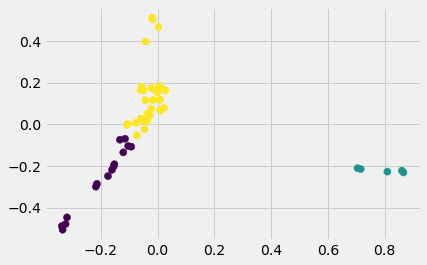

In [299]:
fig1=plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis') #purple is 0. blue 1 and yellow 2

[[-0.19756294 -0.25649726]
 [ 0.79105871 -0.22079408]
 [-0.02833855  0.14146941]]


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


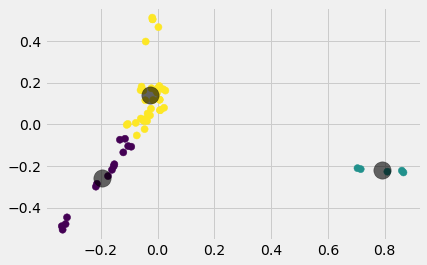

In [313]:
centers = kmeans.cluster_centers_
print(centers)
fig1=plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis') #purple is 0, blue is 1 and yellow is 2
fig2=plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)
plt.savefig('Kmeansmembers.pdf', dpi=100)
plt.show()

In [322]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats): #defines a function to get the top features
    labels = np.unique(prediction) #gets all unique words coming post the PCA
    dfs = [] #builds an empty list
    for label in labels: #loops on all words
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
       #applies the function with my vectorizer defined above
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means] #word+mean score for a given cluster
        df = pd.DataFrame(best_features, columns = ['features', 'score']) #should turn in a dataframe
        dfs.append(df)
    return dfs

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


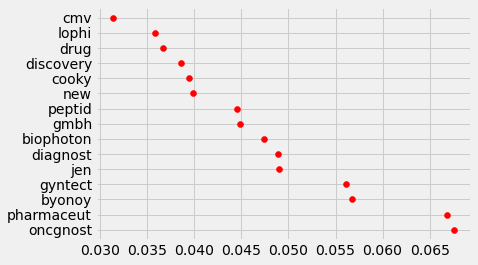

In [86]:
plt.scatter(cluster1.iloc[0]['score'], cluster1.iloc[0]['features'], c='r') #plots the importance of each keywords

In [89]:
clusterdb2=clusterdb.assign(score = cluster1.iloc[0]['score']) #adds the second column to the db previously def

In [92]:
clusterdb2["score"]=clusterdb2["score"].apply(pd.to_numeric, errors='coerce')
clusterdb2["score"]=round(clusterdb2["score"], 3)
#clusterdb2["score"]= clusterdb2["score"].replace('\n','', regex=True)
clusterdb2["score"]=clusterdb2["score"].replace(r'\\n',' ', regex=True)
##clusterdb2["score"] = clusterdb2["score"].astype(np.int64)
print(clusterdb2["score"])


0     0.068
1     0.067
2     0.057
3     0.056
4     0.049
5     0.049
6     0.047
7     0.045
8     0.045
9     0.040
10    0.039
11    0.039
12    0.037
13    0.036
14    0.031
Name: score, dtype: float64


In [314]:
#applies to my prepared text and normalizes it -- stored in a matrix /// non members
tf_idf = vectorizer.fit_transform(temp_df_out['prep'])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray() #calls the matrix to get the non members contents

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [315]:
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array) #applies the PCA with 2D

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [317]:
true_k = 3 #again summarizes to 3 clusters
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(tf_idf_array)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, us

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [318]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1] #converts each centroid into a sorted (descending) list of the columns most "relevant"
terms = vectorizer.get_feature_names()

Top terms per cluster:


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [319]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 hal
 umwelt
 gmbh
 bioanalytik
 toxikolog
 mikrobiologisch
 chemisch
 biotechnolog
 analytik
 ifb
Cluster 1:
 dat
 gmbh
 genetek
 contact
 polymeras
 hapscreen
 googl
 produc
 dna
 cooky
Cluster 2:
 biopharm
 lin
 hesit
 biosimil
 cel
 develop
 hennigsdorf
 neuendorfstr
 licens
 condit


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [320]:
#applies the PCA transformation in two dimensions
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto') #predictions with 3 clusters
fitted = kmeans.fit(Y_sklearn) #fits the model
prediction = kmeans.predict(Y_sklearn) #gets the predictions
#print(Y_sklearn) ##contains the respective coordinates

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, us

[[-1.06623896e-01 -9.40607307e-02]
 [ 7.96128224e-01 -5.88341964e-05]
 [-1.26935446e-01  3.89722194e-01]]


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


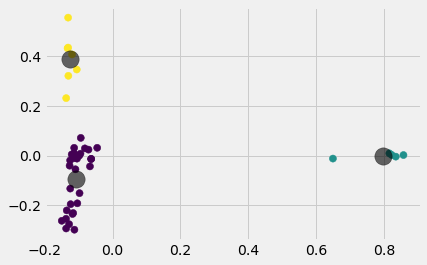

In [321]:
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis') #purple is 0, blue is 1 and yellow is 2
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)
plt.savefig('Kmeansnonmembers.pdf', dpi=100)
plt.show()

In [208]:
###similarity of the corpus via cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
#applies the cosine to the new db
vectorizer = TfidfVectorizer(analyzer='word')
trained_vectorizer = vectorizer.fit(temp_df_out['prep']) #fits the training vectors with the contents of the non members
vocabulary = vectorizer.vocabulary_
#print(vocabulary) #relaxes the constraint I had before, all words with all lengths provided
len(vocabulary)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11554

In [338]:
search_tfidf = trained_vectorizer.transform(temp_df_in['prep'])
search_tfidf.shape

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(55, 11554)

In [210]:
#applies the similarity based on frequency with the dictionary approach: first corpus for members and uses the text argument referring to the contents from the non members
#function applies the vectorizer to the column of text prepared for non members
temp_df_out['similarity'] = temp_df_out["prep"].apply(lambda text: cosine_similarity(search_tfidf, trained_vectorizer.transform([text])).tolist()[0][0])
#similarity2= cosine_similarity(temp_df_out["prep"].str, temp_df_in["prep"].str)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\FBS\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, us

In [211]:
print(temp_df_out['similarity']) #here gives back a list of similarity along the two corpus

1     0.339229
2     0.740926
3     0.464608
4     0.233258
10    0.067717
11    0.073402
12    0.050595
13    0.050822
14    0.044759
19    0.043688
37    0.075479
38    0.000000
39    0.115762
40    0.052592
41    0.000000
47    0.104404
51    0.037082
56    0.035459
58    0.203637
59    0.084386
60    0.115899
61    0.035860
63    0.021695
64    0.059410
65    0.131092
69    0.275242
72    0.037238
74    0.037138
75    0.013280
76    0.068199
77    0.130040
81    0.019744
82    0.073005
86    0.078281
87    0.047183
88    0.066730
90    0.119467
91    0.090064
92    0.056021
94    0.126578
95    0.073498
Name: fulltext, dtype: float64


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
print(pd.Series.mean(temp_df_out['similarity'])) #11% of overlap on avg

0.109596839384398


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:


vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

In [ ]:
#applies the vector to the cleaned doc stored in a matrix X
X = vectorizer.fit_transform(temp_df_in['prep'])

X.shape

In [ ]:
###topic modelling: defines 20 clusters of topics through the SVD transformation
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

In [ ]:
#applies the model to the cleaned X matrix and the 1000 key terms
svd_model.fit(X)

len(svd_model.components_) #returns the initial components definition

In [ ]:
terms = vectorizer.get_feature_names() #features extractions

In [ ]:
#makes a loop with the features extraction function called terms
for i, comp in enumerate(svd_model.components_): #loops for each word in each component the features extraction
    terms_comp = zip(terms, comp) #extracts the features names for each component
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7] #here selects the 7 most important words for each component called comp
  #  print("Topic "+str(i)+": ") #returns the results for each component
  #  for t in sorted_terms:
  #      print(t[0])
  #      print(" ")

In [ ]:
#reduction of dimensionality with uniform Manifold Approximation and Projection
import umap.umap_ as umap
#loads the SVD model within the matrix
X_topics = svd_model.fit_transform(X)
X_topics.shape

In [ ]:
#applied the UMAP to the topics by keeping 150 dimensions (too much! should be 2-100), effective minimum distance between embedded points 0.5. Smaller values will result in a more clustered/clumped embedding where nearby points
embedding = umap.UMAP(n_neighbors=5, min_dist=0.5, random_state=12).fit_transform(X_topics)

In [ ]:
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [ ]:
#plots the results of the clustering topics with dimension reduction
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], #coordinates of the points : x and y
#c = dataset.target, #fits the target news
s = 10, # size
edgecolor='none'
)
plt.show()

In [353]:
#LDA analysis starts with the members of the biotech clusters
tokenized_doc = temp_df_in['prep'].apply(lambda x: x.split())

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [354]:
# Create Dictionary: works with array of tokens (went back up to get it)
id2word = corpora.Dictionary(tokenized_doc)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [355]:
# Create Corpus works with array of tokens (went back up to get it)
texts = tokenized_doc

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View -> unique id for each word in the document and its co-occurence
#print(corpus[:1]) #here returns for the first doc

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
#print(corpus[:6])

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [356]:
id2word[8] #calls the first word in the dictionnary

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'appl'

In [357]:
len(id2word) #dictionnary with 13325 words

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


13325

In [358]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, #calls the corpis
                                           id2word=id2word, #the different words identified in the dictionnary: each keyword contributes a certain weightage to the topic
                                           num_topics=5,  #built with 20 different topics where each topic is a combination of keywords 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [347]:
doc_lda = lda_model[corpus] 

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [348]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.777789255002746


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [349]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_doc, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4261724946546356


In [359]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook() #allows the notebook to display interactive viz

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [361]:
# Visualize the topics Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
#A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.
vis = gensimvis.prepare(lda_model, corpus, id2word)
#error with the preparation -> checking the updated correct way to do it
#vis

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
pyLDAvis.save_html(vis, "members6topics.html")

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [243]:
#LDA analysis extends with the non-members of the biotech clusters
tokenized_doc_out = temp_df_out['prep'].apply(lambda x: x.split())

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
# Create Dictionary: works with array of tokens (went back up to get it)
id2word_out = corpora.Dictionary(tokenized_doc_out)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [264]:
len(id2word_out) 

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11554

In [265]:
# Create Corpus works with array of tokens (went back up to get it)
texts = tokenized_doc_out

# Term Document Frequency
corpus_out = [id2word_out.doc2bow(text) for text in texts]
#dictionary = corpora.Dictionary(texts)  #computes the dictionnary in the same loop with Hash Dictionnary due to an index issue by splitting the steps
# View -> unique id for each word in the document and its co-occurence
print(corpus_out[:1])

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 20), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 3), (28, 2), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 7), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 5), (41, 2), (42, 1), (43, 3), (44, 2), (45, 2), (46, 1), (47, 5), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 4), (79, 2), (80, 1), (81, 1), (82, 3), (83, 1), (84, 3), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 2), (92, 2), (93, 1), (94, 1), (95, 3), (96, 1), (97, 3), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 4), (104, 1), (105, 1), (106, 1), (107, 1), (108, 4), (109, 1), (110, 1

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [266]:
# Build LDA model
lda_model_out = gensim.models.ldamodel.LdaModel(corpus=corpus_out, #calls the corpis
                                           id2word=id2word_out, #the different words identified in the dictionnary: each keyword contributes a certain weightage to the topic
                                           num_topics=5,  #built with 20 different topics where each topic is a combination of keywords 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [267]:
print(lda_model_out.print_topics())

[(0, '0.041*"protein" + 0.040*"proteom" + 0.028*"analys" + 0.027*"system" + 0.027*"icpl" + 0.019*"gmbh" + 0.015*"institut" + 0.014*"project" + 0.014*"peptid" + 0.014*"biochem"'), (1, '0.022*"sysmex" + 0.019*"test" + 0.014*"inost" + 0.009*"serv" + 0.008*"technolog" + 0.008*"blood" + 0.008*"websit" + 0.007*"develop" + 0.007*"inform" + 0.007*"bas"'), (2, '0.020*"acid" + 0.016*"amino" + 0.013*"resin" + 0.011*"startet" + 0.010*"artikel" + 0.009*"gmbh" + 0.006*"reag" + 0.006*"inform" + 0.006*"peptid" + 0.006*"ber"'), (3, '0.012*"dat" + 0.011*"gmbh" + 0.008*"bianoscy" + 0.006*"genet" + 0.006*"personenbezog" + 0.005*"germany" + 0.005*"person" + 0.005*"verarbeitung" + 0.005*"develop" + 0.004*"gen"'), (4, '0.019*"aav" + 0.011*"cel" + 0.010*"dat" + 0.008*"keratin" + 0.008*"produc" + 0.008*"inform" + 0.008*"protein" + 0.008*"antibody" + 0.007*"websit" + 0.007*"cooky"')]


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [268]:
doc_lda_out = lda_model[corpus_out] 

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [258]:
print('\nPerplexity: ', lda_model_out.log_perplexity(corpus_out))  # a measure of how good the model is. lower the better.


Perplexity:  -7.345823935879723


C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [270]:
coherence_model_lda_out = CoherenceModel(model=lda_model_out, texts=tokenized_doc_out, dictionary=id2word_out, coherence='c_v')
coherence_lda_out = coherence_model_lda_out.get_coherence()
print('\nCoherence Score: ', coherence_lda_out)

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5157566841989765


In [287]:
#A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.
visout = gensimvis.prepare(lda_model_out, corpus_out, id2word_out)
#error with the preparation -> checking the updated correct way to do it
#visout

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
pyLDAvis.save_html(visout, "nonmembers6topics.html")

C:\Users\FBS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
